In [1]:
using GynC, Plots, Distributions
gr()

cookie: p06qK61PbDeiSJZB
VERSION: 0.5.0


worker_arg: `--worker p06qK61PbDeiSJZB`



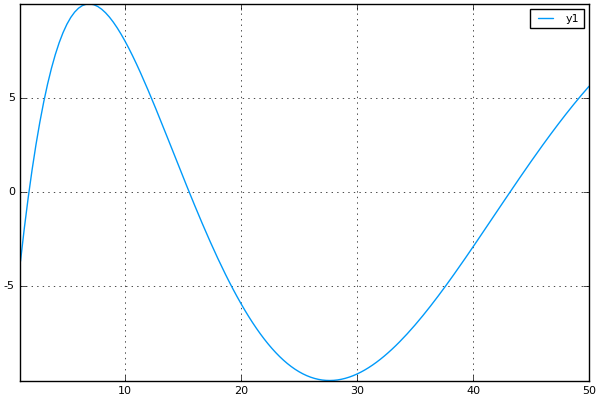

In [2]:
xs = collect(1:1/3:50)
phi(k) = (GynC.Federn.odeohnetreatment(k))[1]
plot(xs, phi.(xs))

In [36]:
measerr = Normal(0,1)
ndata = 300
augz = 100
prior = GynC.Federn.prior

m = GynC.syntheticmodel(xs, phi, prior, ndata, augz, measerr)

augd = 100
@show stdd = KernelDensity.default_bandwidth(m.datas)
ms = GynC.smoothdata(m, augd, stdd);

stdd = KernelDensity.default_bandwidth(m.datas) = 1.5760575231076936


In [50]:
w0 = ones(length(xs)) / length(xs);

w0 = pdf(Distributions.Beta(3,3), xs/50)
w0 = w0 / sum(w0)

wprior = pdf(prior, xs)
wprior = wprior / sum(wprior);

In [56]:
niter = 500
h = 0.1

ws = Dict()
@time ws["NPMLE"] = GynC.em(m, w0, niter)
@time ws["DS-MLE"] = GynC.em(ms, w0, niter);
@time ws["MPLE"]  = GynC.mple(m, w0, niter, .98, h)
@time ws["Reference Prior"] = GynC.mple(m, w0, niter, 1, h);

  0.153574 seconds (2.02 k allocations: 1.901 MB)
 27.543141 seconds (2.52 k allocations: 115.159 MB, 0.14% gc time)
 10.894222 seconds (595.04 k allocations: 359.109 MB, 0.71% gc time)
 10.634843 seconds (605.01 k allocations: 185.941 MB, 0.45% gc time)


In [57]:
labels = ["NPMLE" "DS-MLE" "Reference Prior" "MPLE"]
densities = map(l->ws[l][end], labels) |> vec

plot(xs, wprior, label="True Prior", linewidth=2, legendfont=font(10), tickfont=font(8), ylims=(0,0.05), size=(600, 350), grid=false)
plot!(xs, densities, labels=labels, linewidth=1.2)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 0.00 
 
 
 0.01 
 
 
 0.02 
 
 
 0.03 
 
 
 0.04 
 
 
 0.05 
 
<polyline clip-path="url(#clip02)" style="stroke:#0099ff; stroke-width:1.4; stroke-opacity:1; fill:none" points="
 43.4296,331.015 47.189,331.015 50.9484,331.015 54.7078,331.015 58.4672,331.015 62.2266,331.015 65.986,331.015 69.7454,331.015 73.5049,331.014 77.2643,331.014 
 81.0237,331.012 84.7831,331.01 88.5425,331.005 92.3019,330.996 96.0613,330.979 99.8207,330.95 103.58,330.899 107.34,330.812 111.099,330.667 114.858,330.432 
 118.618,330.06 122.377,329.485 126.137,328.616 129.896,327.334 133.655,325.491 137.415,322.904 141.174,319.365 144.934,314.645 148.693,308.51 152.452,300.749 
 156.212,291.194 159.971,279.76 163.731,266.475 167.49,251.51 171.25,235.199 175.009,218.048 178.768,200.716 182.528,183.983 186.287,168.699 190.047,155.709 
 193.806,145.78 197.565,139.522 201.325,137.329 205.084,139.336 208.844,145.4 212.603,155.118 216.362,167.872 220.122,182.886 223.881,199.303 227.641,216.266 
 231.4,232.983 235.16,248.781 238.919,263.144 242.678,275.724 246.438,286.335 250.197,294.935 253.957,301.595 257.716,306.467 261.475,309.748 265.235,311.658 
 268.994,312.412 272.754,312.207 276.513,311.216 280.272,309.582 284.032,307.418 287.791,304.814 291.551,301.841 295.31,298.554 299.07,294.998 302.829,291.214 
 306.588,287.238 310.348,283.11 314.107,278.868 317.867,274.555 321.626,270.217 325.385,265.903 329.145,261.662 332.904,257.55 336.664,253.619 340.423,249.924 
 344.182,246.517 347.942,243.449 351.701,240.766 355.461,238.51 359.22,236.716 362.98,235.414 366.739,234.624 370.498,234.359 374.258,234.624 378.017,235.414 
 381.777,236.716 385.536,238.51 389.295,240.766 393.055,243.449 396.814,246.517 400.574,249.924 404.333,253.619 408.092,257.55 411.852,261.663 415.611,265.904 
 419.371,270.22 423.13,274.56 426.889,278.878 430.649,283.129 434.408,287.274 438.168,291.278 441.927,295.114 445.687,298.757 449.446,302.189 453.205,305.396 
 456.965,308.372 460.724,311.111 464.484,313.615 468.243,315.887 472.002,317.934 475.762,319.766 479.521,321.394 483.281,322.832 487.04,324.093 490.799,325.192 
 494.559,326.143 498.318,326.961 502.078,327.66 505.837,328.254 509.597,328.755 513.356,329.175 517.115,329.526 520.875,329.816 524.634,330.055 528.394,330.25 
 532.153,330.409 535.912,330.538 539.672,330.641 543.431,330.724 547.191,330.789 550.95,330.841 554.709,330.882 558.469,330.913 562.228,330.938 565.988,330.957 
 569.747,330.971 573.507,330.982 577.266,330.991 581.025,330.997 584.785,331.002 588.544,331.005 592.304,331.008 596.063,331.01 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e9746a; stroke-width:0.84; stroke-opacity:1; fill:none" points="
 43.4296,330.727 47.189,329.533 50.9484,329.464 54.7078,329.475 58.4672,330.975 62.2266,304.572 65.986,329.312 69.7454,320.817 73.5049,330.091 77.2643,329.3 
 81.0237,318.325 84.7831,328.109 88.5425,331.014 92.3019,331.015 96.0613,331.015 99.8207,331.015 103.58,331.015 107.34,331.015 111.099,331.015 114.858,331.015 
 118.618,331.015 122.377,331.015 126.137,331.015 129.896,331.015 133.655,331.015 137.415,330.708 141.174,313.242 144.934,277.798 148.693,301.839 152.452,324.127 
 156.212,327.162 159.971,317.502 163.731,262.548 167.49,261.588 171.25,308.642 175.009,305.204 178.768,136.527 182.528,-99.1996 186.287,310.578 190.047,330.686 
 193.806,330.722 197.565,317.328 201.325,45.9464 205.084,57.3295 208.844,249.077 212.603,281.731 216.362,272.995 220.122,242.671 223.881,202.882 227.641,223.432 
 231.4,276.123 235.16,292.754 238.919,281.357 242.678,270.342 246.438,287.435 250.197,301.347 253.957,296.46 257.716,274.065 261.475,264.162 265.235,292.448 
 268.994,317.128 272.754,325.718 276.513,327.841 280.272,327.738 284.032,325.883 287.791,320.955 291.551,309.886 295.31,287.796 299.07,249.484 302.829,194.542 
 306.588,135.344 310.348,98.0506 314.107,104.881 317.867,151.506 321.6

In [12]:
function weightedquantile(ys, w; quantiles=collect(1/8:1/8:7/8))
  sp = sortperm(ys)
  cs = cumsum(w[sp])
  mx = cs[end]
  quantileinds = [findfirst(x->x>=q, cs) for q = mx*quantiles]
  ys[sp[quantileinds]]
end

function calcquantiles(ts, sols, w;quantiles = collect(1/10:1/10:9/10))
  res = Matrix(length(ts), length(quantiles))
  for t in 1:length(ts)
      res[t,:] = weightedquantile([sols[x][t] for x in 1:length(xs)], w, quantiles = quantiles)
  end
  res
end

function plotquantiles(ts, sols, w)
    
  res = calcquantiles(ts, sols, w)
  n = size(res,2)
  p = plot()
  mid = Int((n+1)/2)
  offsets = Int((n-1)/2):-1:0 
  for o in offsets
    plot!(ts, res[:,mid-o], fillrange=res[:,mid+o])
  end
  p
end

function bayesposterior(m, data, wprior)
    L = likelihoodmat(m.ys, data, m.measerr)
    GynC.emiteration(wprior, L)
end

function plottrajdens(ts, sols, w)

  msol = hcat(sols...)
  mkde = hcat([KernelDensity.kde(msol[t,:], boundary = (-13,13), weights=w, bandwidth = 0.5).density for t in 1:size(msol, 1)]...)

  contour(ts, linspace(-13,13, 2048), mkde, clims=(1e-5,0.3), fill=true, seriescolor = :heat, legend=false)
end

plottrajdens (generic function with 1 method)


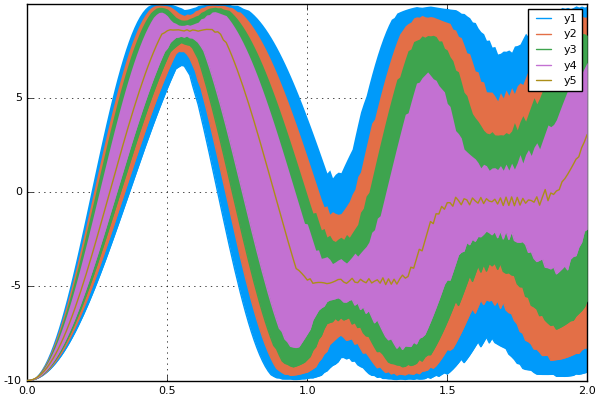

In [13]:
ts = 0:1/100:2
sols = [GynC.Federn.odesol(k,ts) for k = xs];
plotquantiles(ts, sols, w)

In [59]:
function plotcol(w) 
    ts = 0:1/100:2
    sols = [GynC.Federn.odesol(k,ts) for k = xs]
    meas = [-4]
    
    
    ylims = (0,0.03)
    local pprior
    if isa(w[1], Vector)
        pprior = plot(xs, w, legend=false, seriescolor= collect(colormap("blues", length(w)))', ylims=ylims)
        w = w[end]
    else
        pprior = plot(xs, w, legend=false, color="black", ylims=ylims)
    end
    
    
    pprioq = plottrajdens(ts, sols, w)
    scatter!(pprioq, repmat([1], length(m.datas)), m.datas, alpha = 0.2, markerstrokewidth = 0, marker=:hline, color=:blue)
    
    ppostq = plottrajdens(ts, sols, bayesposterior(m, meas, w))
    scatter!(ppostq, [1], meas, marker=:hline, color=:blue, ms=6)
    [pprior, pprioq, ppostq]
end

#plot(plotcol(ws["NPMLE"])..., size=(1000,400), layout=(1,3))

plotcol (generic function with 1 method)

In [60]:
aplots = hcat(plotcol(wprior), plotcol(ws["NPMLE"]), plotcol(ws["DS-MLE"]), plotcol(ws["MPLE"]))'
plot(aplots..., size=(1200,900))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 0.000 
 
 
 0.005 
 
 
 0.010 
 
 
 0.015 
 
 
 0.020 
 
 
 0.025 
 
 
 0.030 
 
<polyline clip-path="url(#clip02)" style="stroke:#00002d; stroke-width:1.8; stroke-opacity:1; fill:none" points="
 52.3185,281.015 53.9766,281.015 55.6347,281.015 57.2928,281.015 58.951,281.015 60.6091,281.015 62.2672,281.015 63.9253,281.014 65.5835,281.014 67.2416,281.013 
 68.8997,281.011 70.5578,281.008 72.216,281.001 73.8741,280.988 75.5322,280.965 77.1904,280.923 78.8485,280.851 80.5066,280.728 82.1647,280.524 83.8229,280.192 
 85.481,279.667 87.1391,278.855 88.7972,277.628 90.4554,275.818 92.1135,273.216 93.7716,269.564 95.4297,264.567 97.0879,257.902 98.746,249.241 100.404,238.283 
 102.062,224.793 103.72,208.649 105.378,189.892 107.037,168.763 108.695,145.734 110.353,121.519 112.011,97.0474 113.669,73.4233 115.327,51.844 116.985,33.5035 
 118.644,19.4839 120.302,10.6486 121.96,7.55328 123.618,10.3862 125.276,18.9473 126.934,32.6693 128.592,50.6764 130.25,71.8737 131.909,95.0533 133.567,119.003 
 135.225,142.605 136.883,164.91 138.541,185.189 140.199,202.951 141.857,217.932 143.515,230.075 145.174,239.478 146.832,246.356 148.49,250.989 150.148,253.685 
 151.806,254.75 153.464,254.461 155.122,253.062 156.78,250.754 158.439,247.699 160.097,244.023 161.755,239.825 163.413,235.184 165.071,230.163 166.729,224.82 
 168.387,219.207 170.045,213.378 171.704,207.39 173.362,201.3 175.02,195.176 176.678,189.084 178.336,183.097 179.994,177.29 181.652,171.74 183.31,166.523 
 184.969,161.714 186.627,157.382 188.285,153.594 189.943,150.409 191.601,147.876 193.259,146.037 194.917,144.922 196.575,144.548 198.234,144.922 199.892,146.037 
 201.55,147.876 203.208,150.409 204.866,153.594 206.524,157.382 208.182,161.714 209.84,166.523 211.499,171.741 213.157,177.291 214.815,183.098 216.473,189.085 
 218.131,195.179 219.789,201.308 221.447,207.404 223.105,213.405 224.764,219.257 226.422,224.912 228.08,230.327 229.738,235.47 231.396,240.316 233.054,244.845 
 234.712,249.045 236.37,252.913 238.029,256.448 239.687,259.656 241.345,262.546 243.003,265.133 244.661,267.432 246.319,269.462 247.977,271.242 249.635,272.793 
 251.294,274.136 252.952,275.291 254.61,276.278 256.268,277.117 257.926,277.824 259.584,278.418 261.242,278.912 262.9,279.322 264.559,279.659 266.217,279.935 
 267.875,280.16 269.533,280.341 271.191,280.487 272.849,280.604 274.507,280.696 276.165,280.769 277.824,280.827 279.482,280.872 281.14,280.906 282.798,280.933 
 284.456,280.953 286.114,280.969 287.772,280.981 289.43,280.99 291.089,280.997 292.747,281.001 294.405,281.005 296.063,281.008 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 20 
 
 
 30 
 
 
 40 
 
 
 50 
 
 
 0.000 
 
 
 0.005 
 
 
 0.010 
 
 
 0.015 
 
 
 0.020 
 
 
 0.025 
 
 
 0.030 
 
<polyline clip-path="url(#clip03)" style="stroke:#edffff; stroke-width:1.8; stroke-opacity:1; fill:none" points="
 352.318,280.305 353.977,279.77 355.635,279.097 357.293,278.291 358.951,277.359 360.609,276.306 362.267,275.139 363.925,273.863 365.583,272.484 367.242,271.008 
 368.9,269.441 370.558,267.787 372.216,266.052 373.874,264.242 375.532,262.361 377.19,260.415 378.848,258.409 380.507,256.348 382.165,254.237 383.823,252.079 
 385.481,249.881 387.139,247.647 388.797,245.381 390.455,243.087 392.113,240.771 393.772,238.435 395.43,236.085 397.088,233.725 398.746,231.358 400.404,228.988 
 402.062,226.619 403.72,224.255 405.378,221.9 407.037,219.557 408.695,217.229 410.353,214.92 412.011,212.633 413.669,210.372 415.327,208.139 416.985,205.937 
 418.644,203.77 420.302,201.64 421.96,199.55 423.618,197.503 425.276,195.501 426.934,193.547 428.592,191.643 430.25,189.792 431.909,187.995 433.567,186.255 
 435.225,184.574 436.883,182.954 438.541,181.397 440.199,179.904 441.857,178.478 443.515,177.12 445.174,175.831 446.832,174.612 448.49,173.466 450.148,172.3